In [200]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [201]:
df= pd.read_csv('/content/CKD.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hrmo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.0,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.0,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.0,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.0,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.0,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes


In [202]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [203]:
df.describe()

,age,blood_pressure,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,51.492308,76.459948,0.899749,0.395990,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597
std,16.995379,13.492053,1.314769,1.041155,74.864224,49.336046,5.623758,9.215829,2.823323,2.715753,8.157274,2526.204544,0.841006
min,2.000000,50.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,6950.000000,4.500000
50%,54.000000,76.459948,0.000000,0.000000,127.000000,44.000000,1.400000,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597
75%,64.000000,80.000000,2.000000,0.000000,150.000000,62.500000,3.077356,141.000000,4.800000,14.600000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      399 non-null    float64
 1   blood_pressure           399 non-null    float64
 2   specific_gravity         399 non-null    object 
 3   albumin                  399 non-null    float64
 4   sugar                    399 non-null    float64
 5   red_blood_cells          399 non-null    object 
 6   pus_cell                 399 non-null    object 
 7   pus_cell_clumps          399 non-null    object 
 8   bacteria                 399 non-null    object 
 9   blood_glucose_random     399 non-null    float64
 10  blood_urea               399 non-null    float64
 11  serum_creatinine         399 non-null    float64
 12  sodium                   399 non-null    float64
 13  potassium                399 non-null    float64
 14  haemoglobin              3

In [205]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      399 non-null    float64
 1   blood_pressure           399 non-null    float64
 2   specific_gravity         399 non-null    object 
 3   albumin                  399 non-null    float64
 4   sugar                    399 non-null    float64
 5   red_blood_cells          399 non-null    object 
 6   pus_cell                 399 non-null    object 
 7   pus_cell_clumps          399 non-null    object 
 8   bacteria                 399 non-null    object 
 9   blood_glucose_random     399 non-null    float64
 10  blood_urea               399 non-null    float64
 11  serum_creatinine         399 non-null    float64
 12  sodium                   399 non-null    float64
 13  potassium                399 non-null    float64
 14  haemoglobin              3

In [207]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [208]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})

df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [209]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['no' 'yes'] values

coronary_artery_disease has ['no' 'yes'] values

class has [nan] values



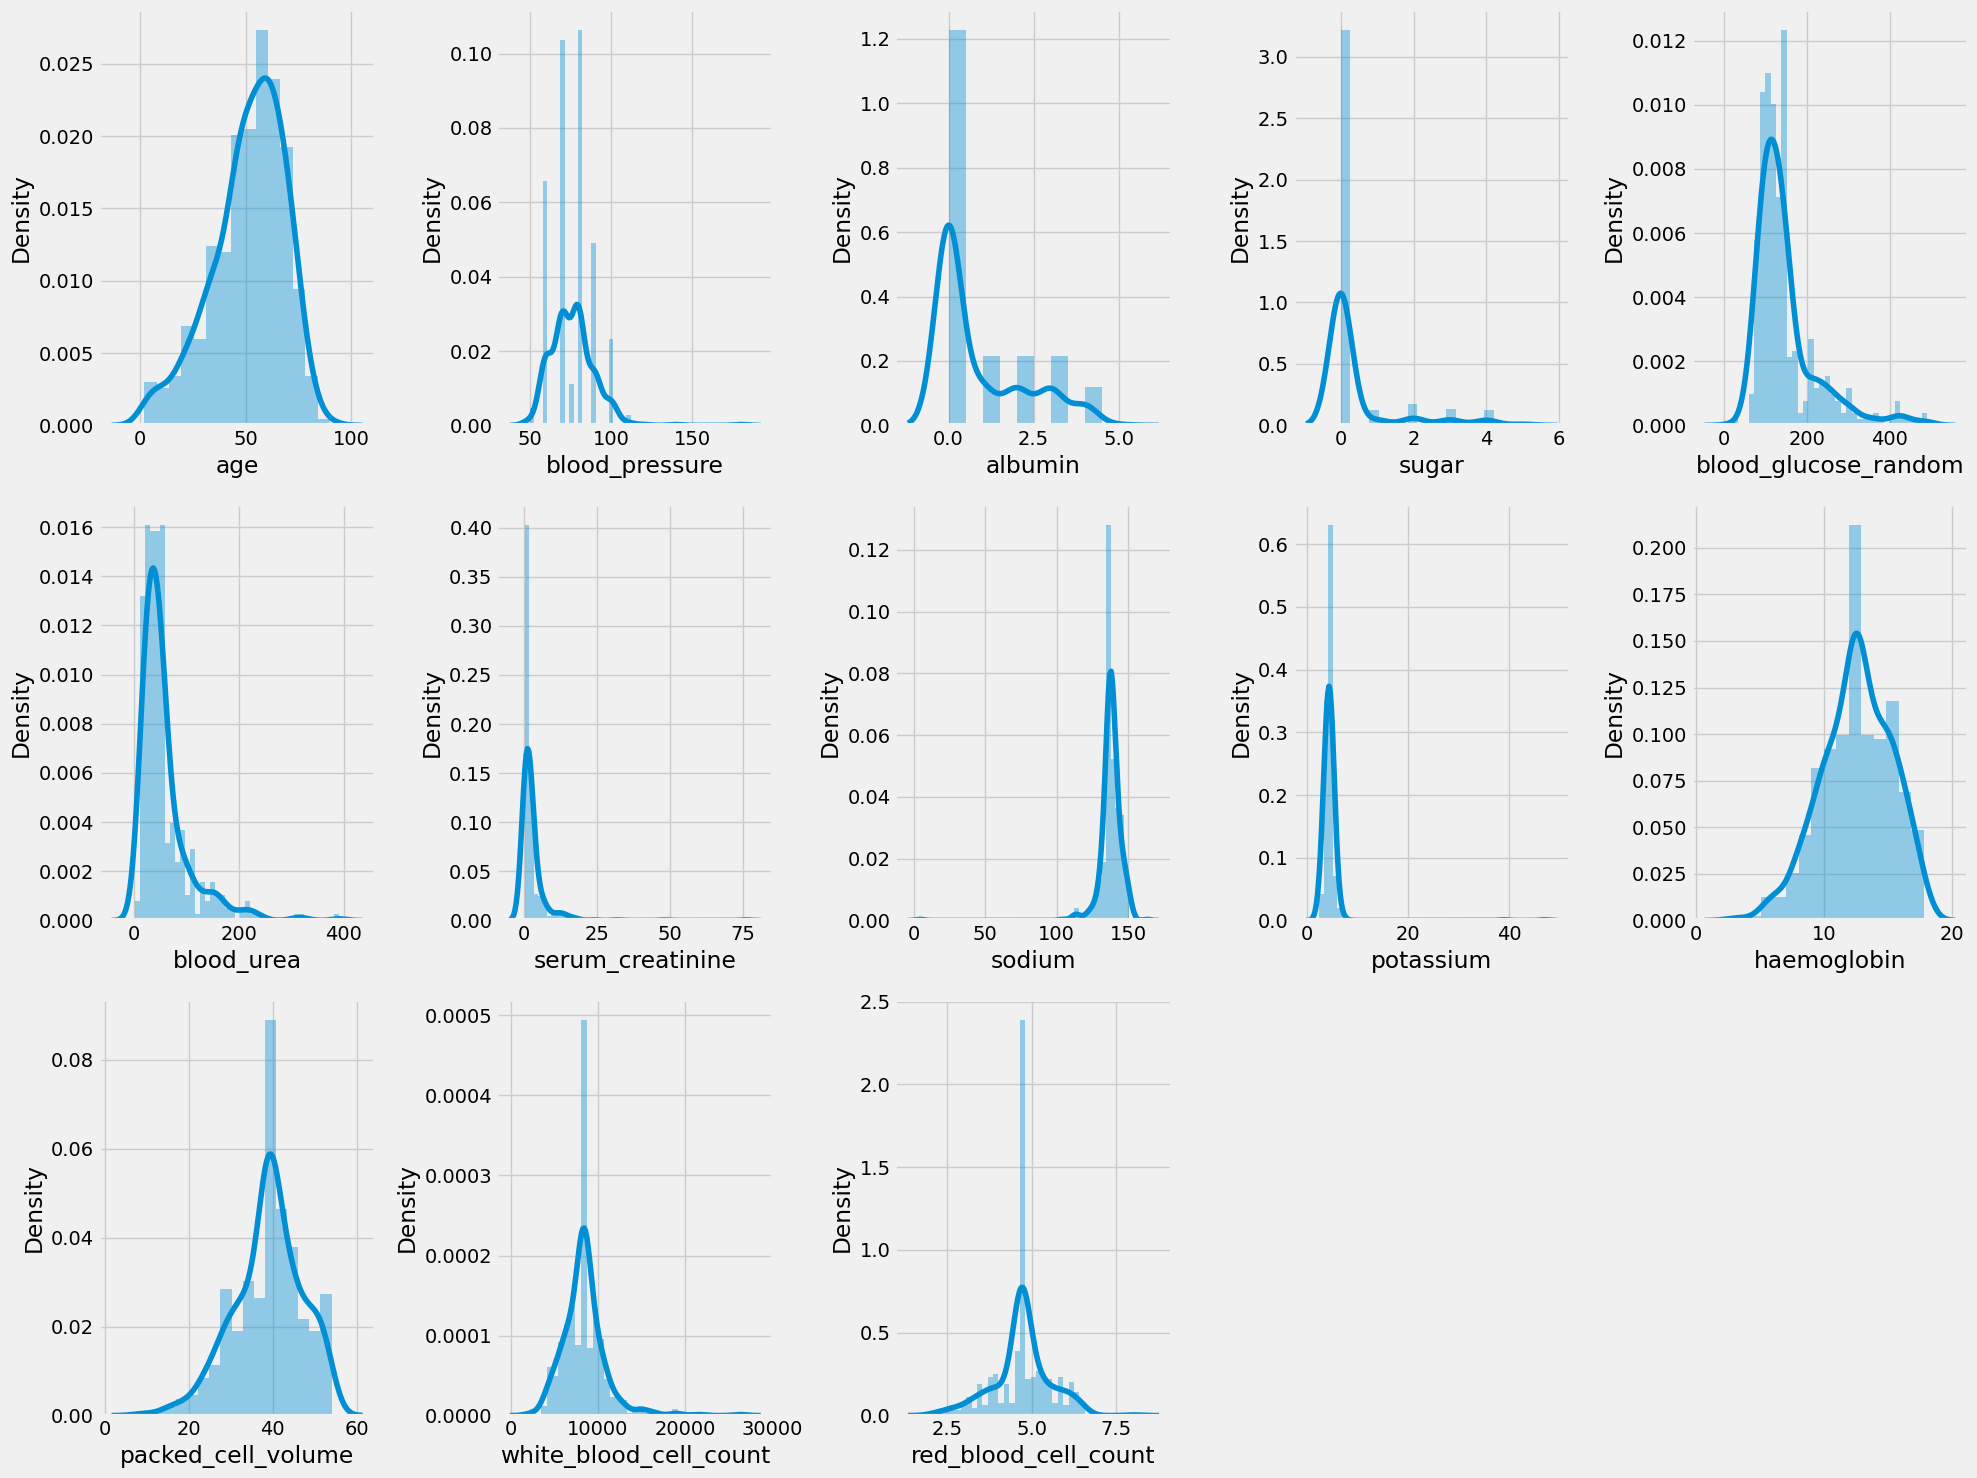

In [210]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hrmo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


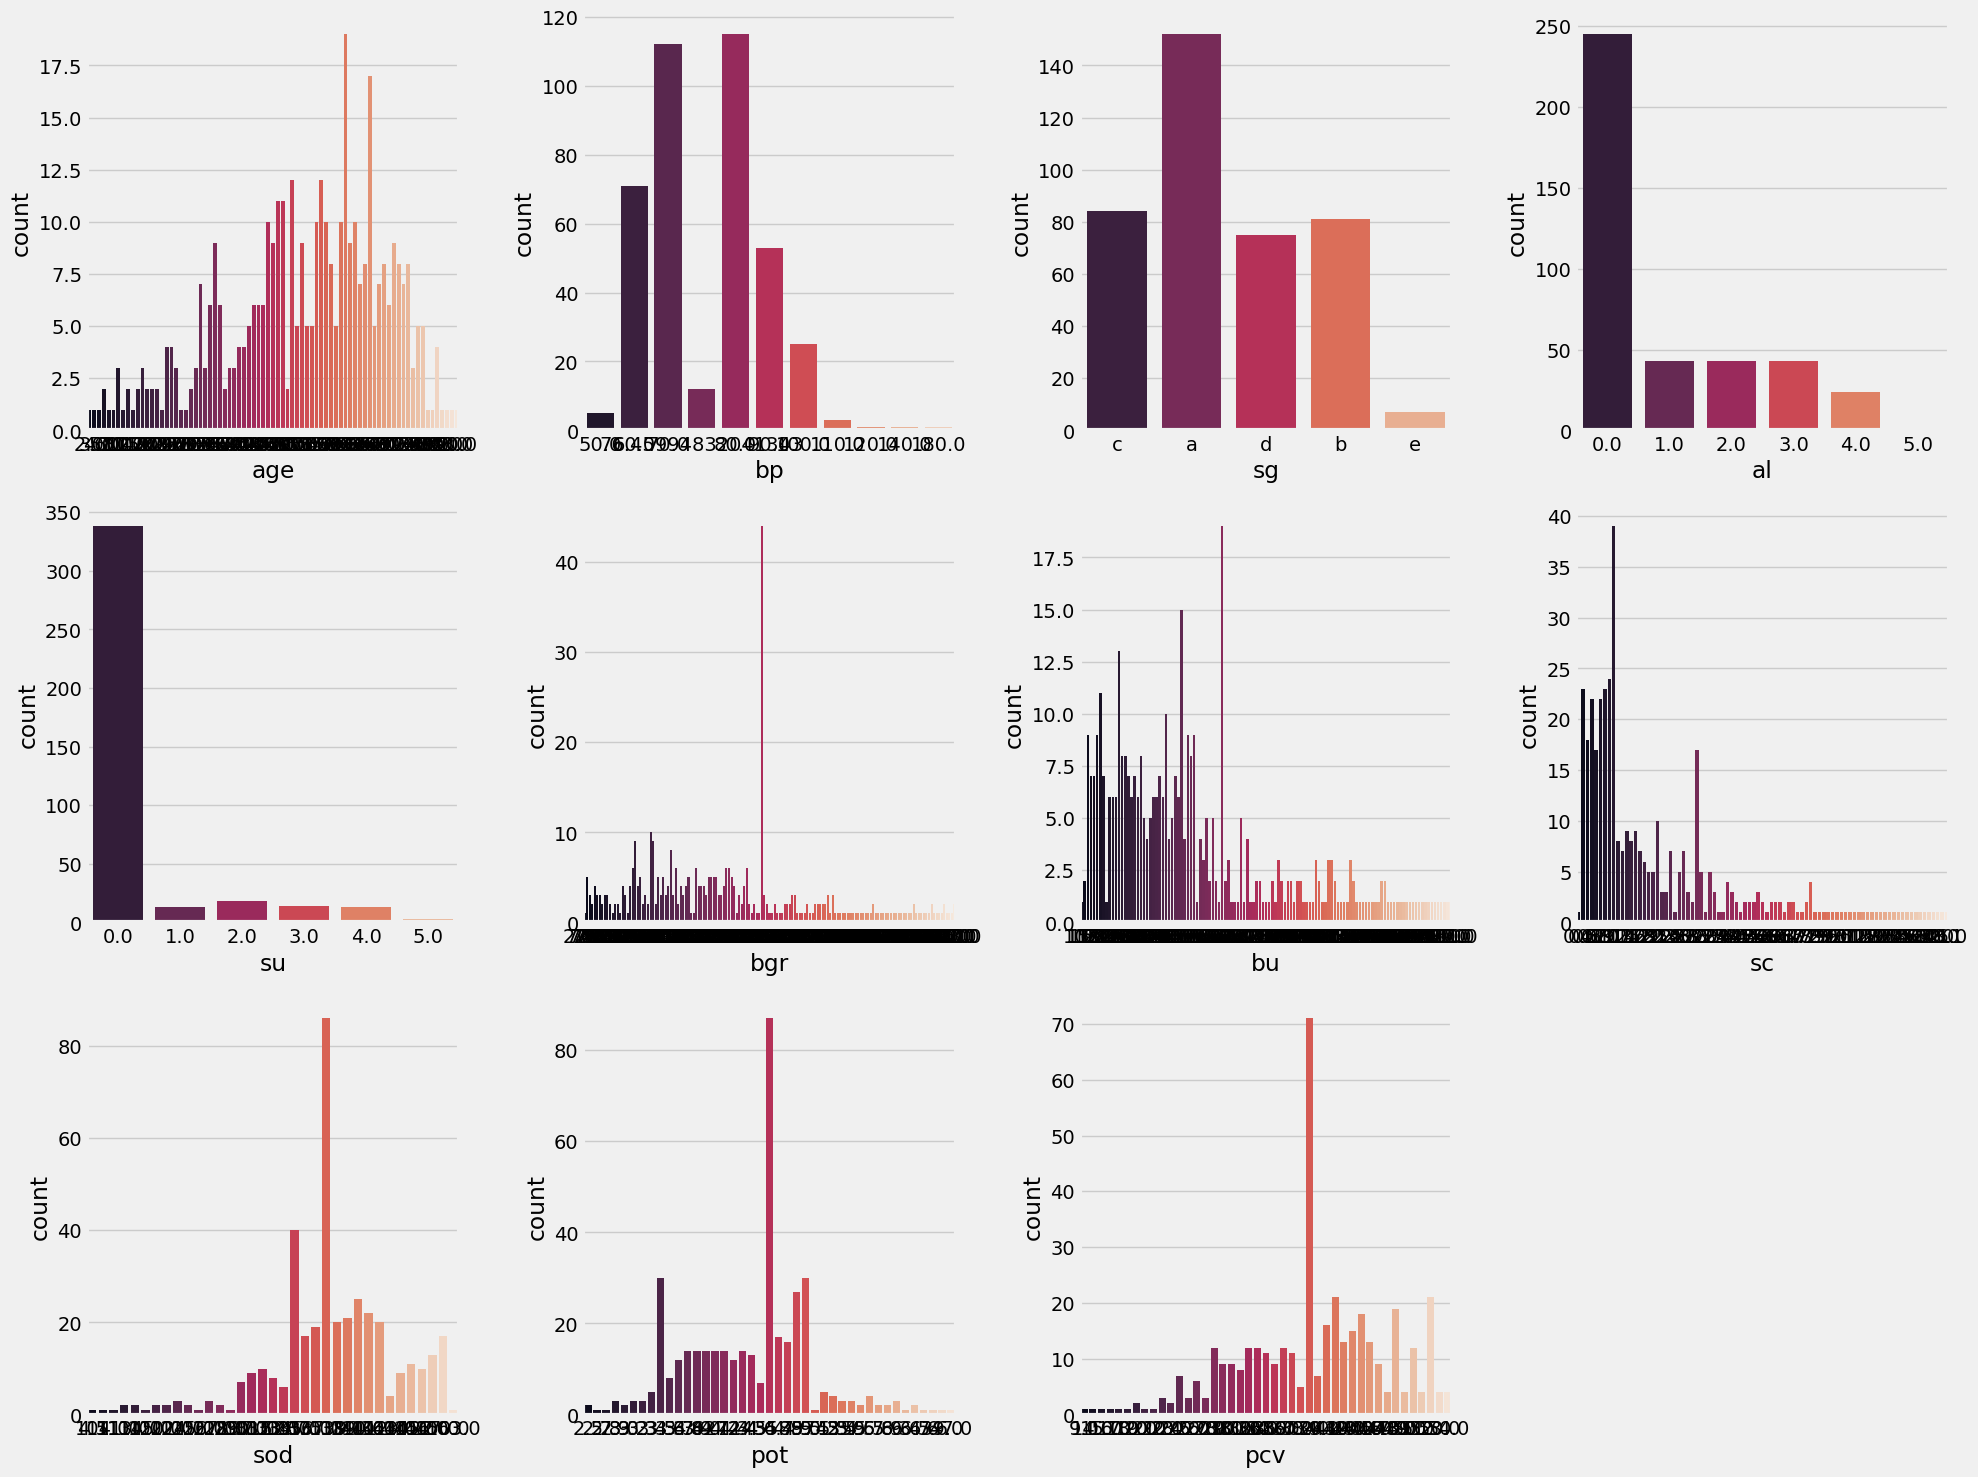

In [211]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data using pandas
df = pd.read_csv('/content/CKD.csv')

# Print the column names to check for 'hemo' and other numeric columns
print(df.columns)

# Manually define the column names for numeric columns
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Check which numeric columns are present in the DataFrame
present_cols = [col for col in num_cols if col in df.columns]

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in present_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df, x=column, palette='rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             399 non-null    float64
 1   bp              399 non-null    float64
 2   sg              399 non-null    object 
 3   al              399 non-null    float64
 4   su              399 non-null    float64
 5   rbc             399 non-null    object 
 6   pc              399 non-null    object 
 7   pcc             399 non-null    object 
 8   ba              399 non-null    object 
 9   bgr             399 non-null    float64
 10  bu              399 non-null    float64
 11  sc              399 non-null    float64
 12  sod             399 non-null    float64
 13  pot             399 non-null    float64
 14  hrmo            399 non-null    float64
 15  pcv             399 non-null    float64
 16  wc              399 non-null    float64
 17  rc              399 non-null    flo

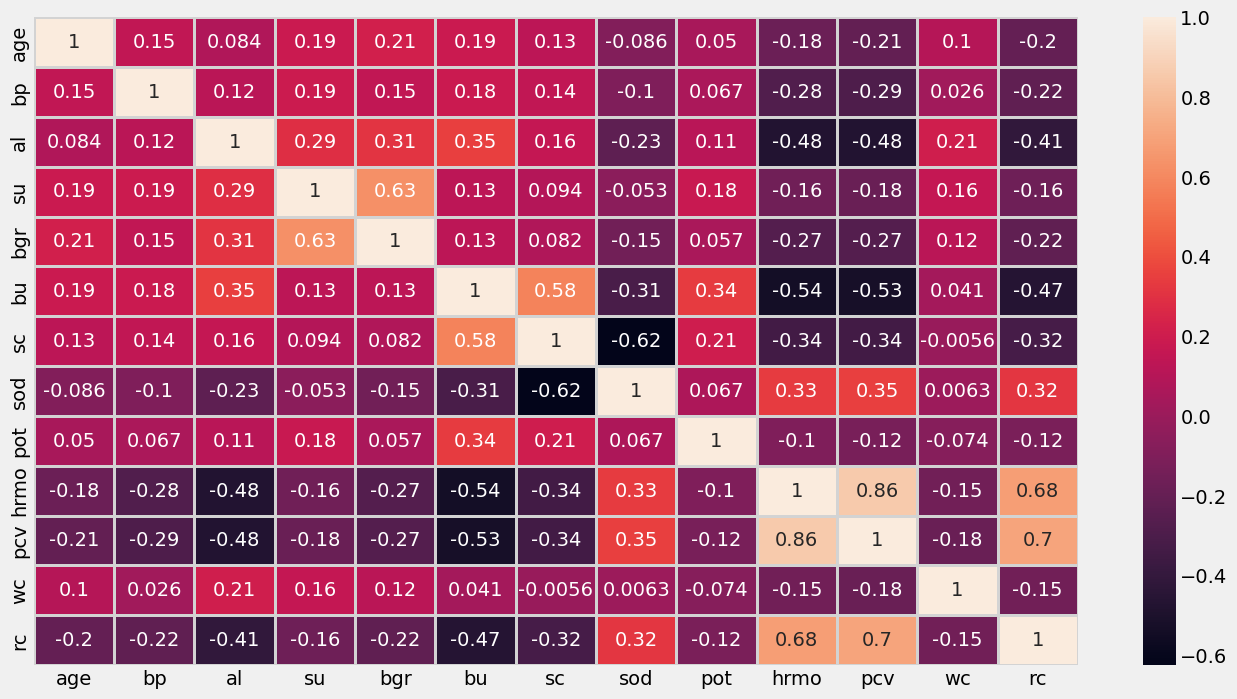

In [213]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [214]:
# Performing Exploratory Data Analysis

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [215]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [216]:
violin('red_blood_cell_count')

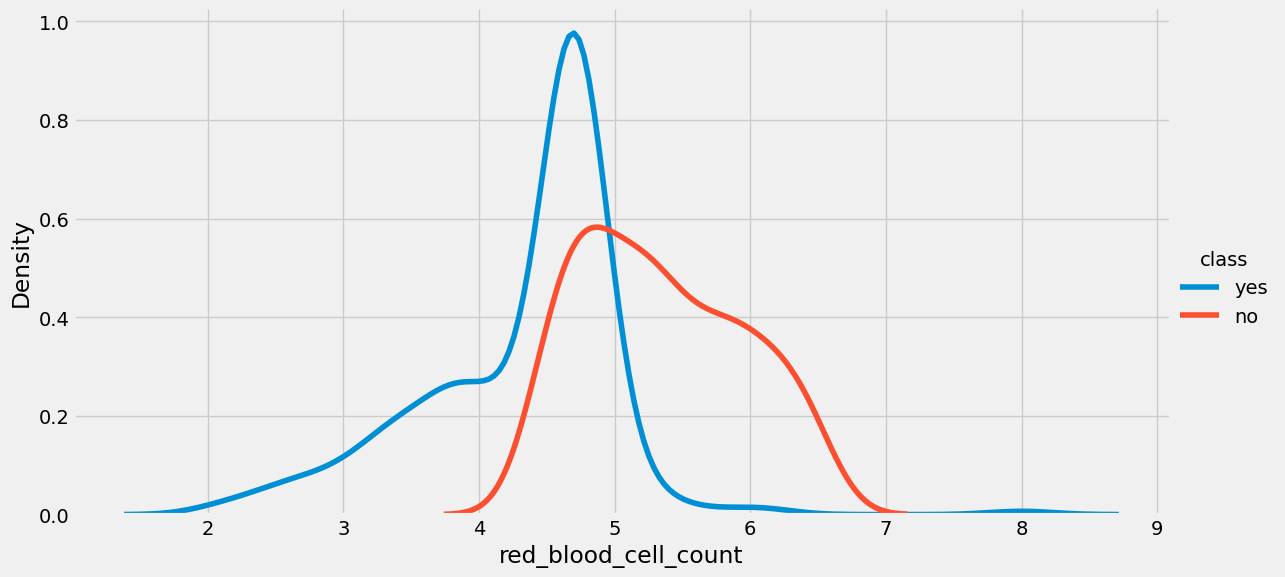

In [217]:
kde('red_blood_cell_count')

In [218]:
violin('white_blood_cell_count')

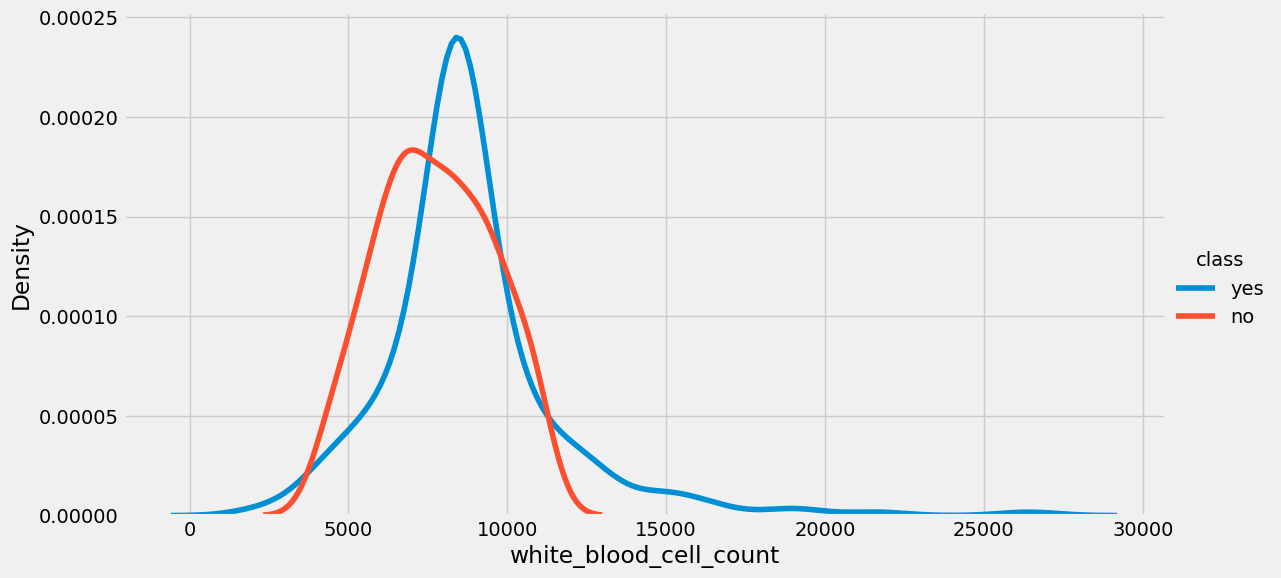

In [219]:
kde('white_blood_cell_count')

In [220]:
violin('packed_cell_volume')

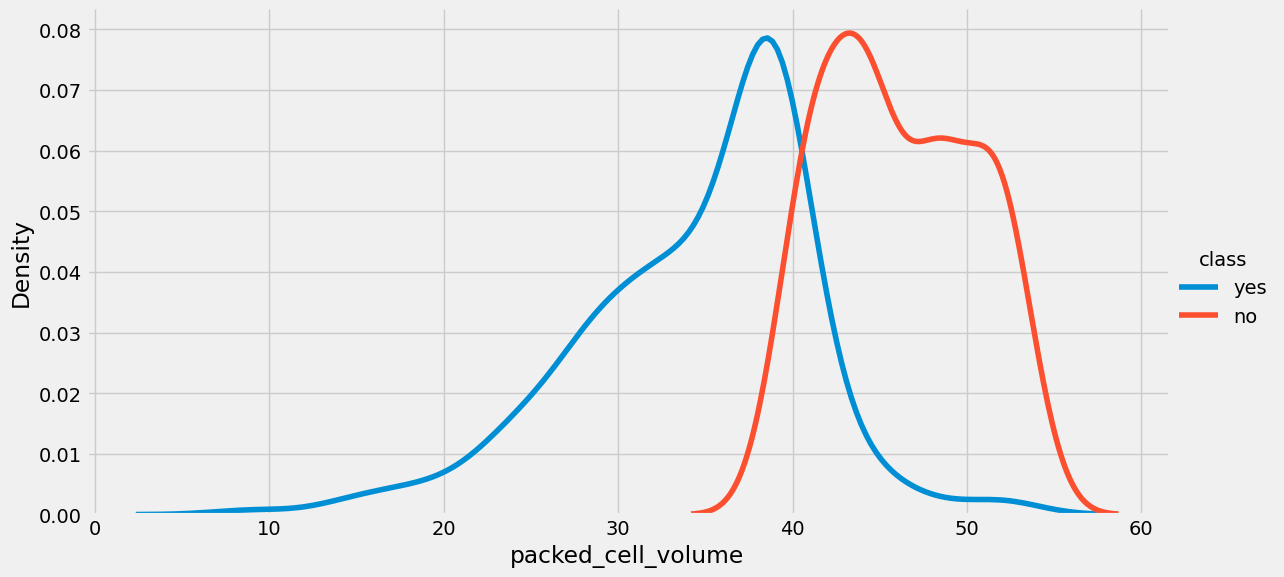

In [221]:
kde('packed_cell_volume')

In [222]:
violin('haemoglobin')

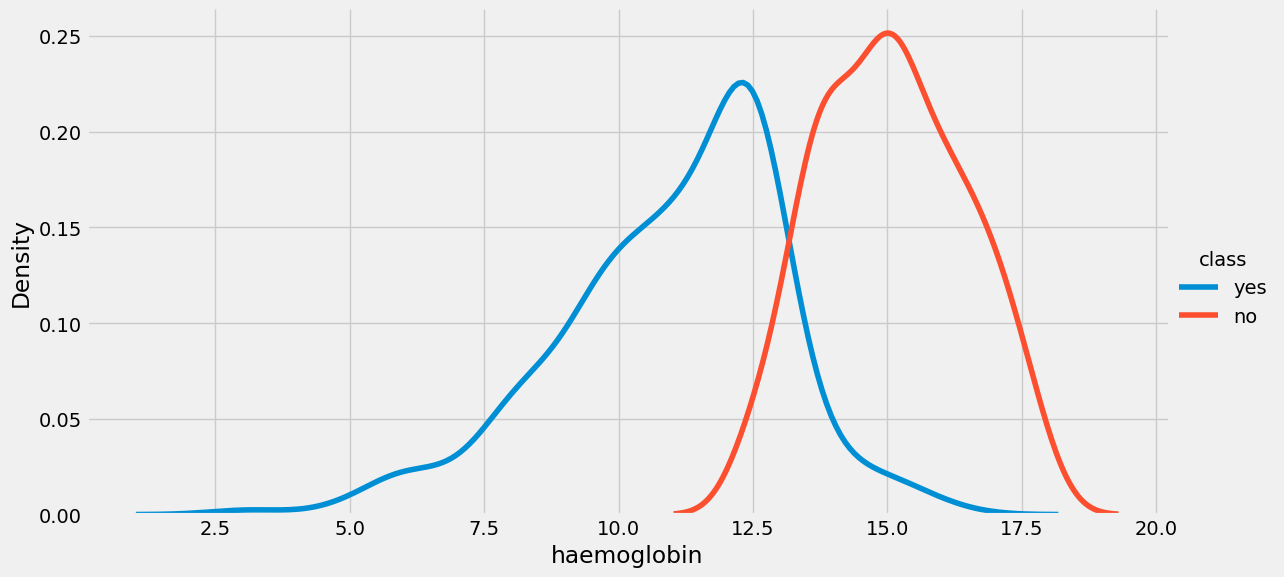

In [223]:
kde('haemoglobin')

In [224]:
violin('albumin')

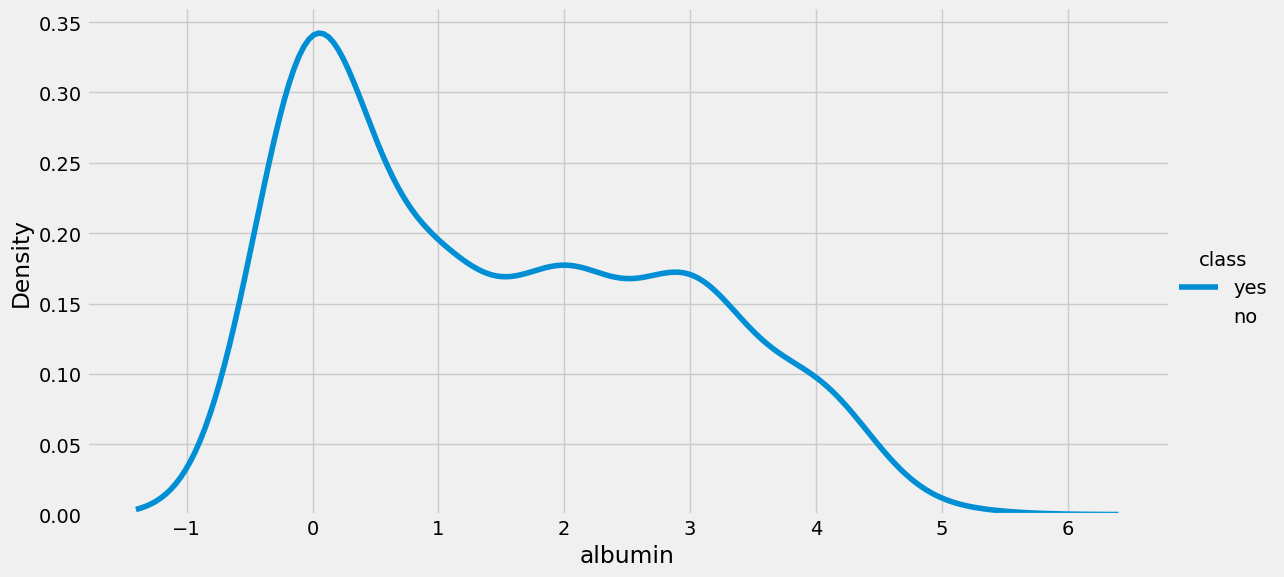

In [225]:
kde('albumin')

In [226]:
violin('blood_glucose_random')

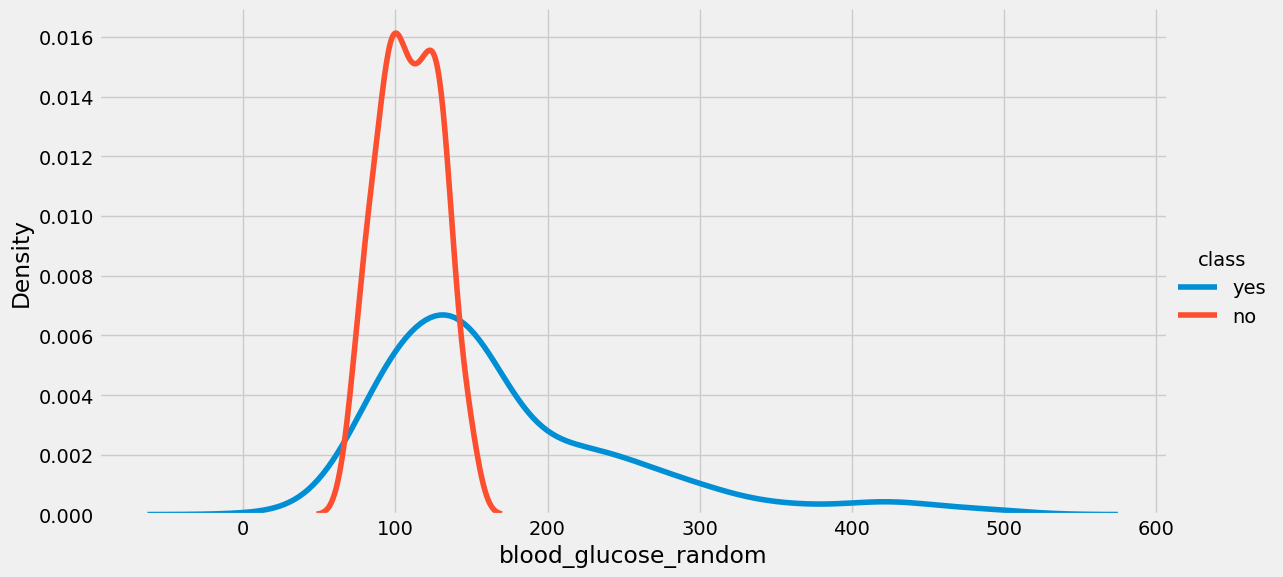

In [227]:
kde('blood_glucose_random')

In [228]:
violin('sodium')

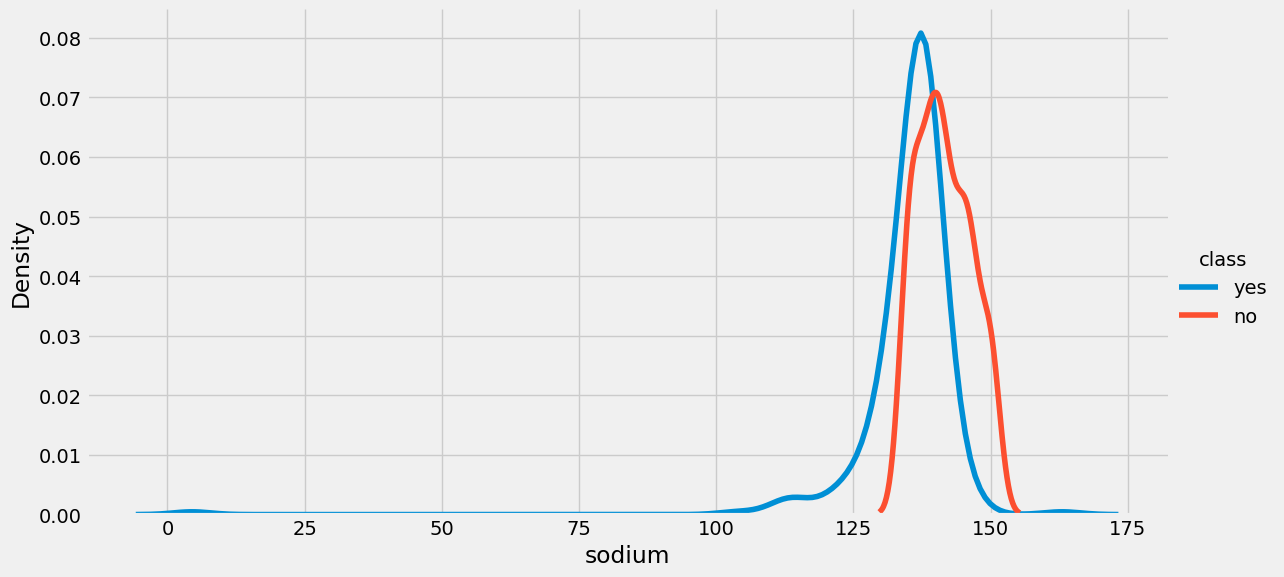

In [229]:
kde('sodium')

In [230]:
violin('blood_urea')

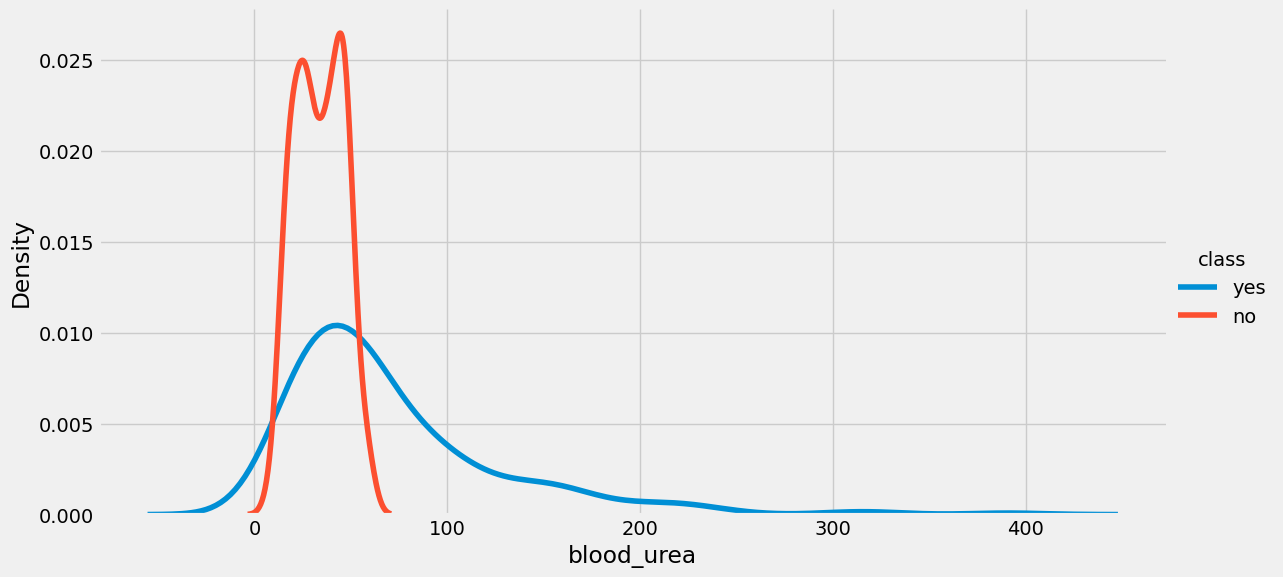

In [231]:
kde('blood_urea')

In [232]:
violin('specific_gravity')

In [233]:
scatter('haemoglobin', 'packed_cell_volume')

In [234]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [235]:
scatter('red_blood_cell_count', 'albumin')

In [236]:
scatter('sugar', 'blood_glucose_random')

In [237]:
scatter('packed_cell_volume','blood_urea')

In [238]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [239]:
px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [240]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)


In [241]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [242]:
# Preprocess the data
# checking for null values

df.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [245]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [247]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [248]:
df[cat_cols].isnull().sum()

specific_gravity           0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [249]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

specific_gravity has 5 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [250]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [251]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,2.0,76.459948,2,3.0,0.0,1,0,0,0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597,0,0,0,1,1,0,1
1,3.0,76.459948,2,2.0,0.0,1,1,0,0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,34.000000,12300.000000,4.705597,0,0,0,1,0,0,1
2,4.0,76.459948,0,1.0,0.0,1,1,0,0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,34.000000,8408.191126,4.705597,0,0,0,1,0,0,1
3,5.0,76.459948,3,1.0,0.0,1,1,0,0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,38.868902,8408.191126,4.705597,0,0,0,1,0,1,1
4,5.0,50.000000,2,0.0,0.0,1,1,0,0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,36.000000,12400.000000,4.705597,0,0,0,1,0,0,1


In [252]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [253]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [264]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[44  1]
 [ 0 75]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.99      1.00      0.99        75

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
"""
      conclusion :

       Hence we achieved outstanding accuracy of  0.9916666666666667 % using Random Forest Classifier
       making it a highly effective and robust model for Predicting the Chronic_Kidney_Disease. Its ensemble
       nature and ability to handle numerous features make it a valuable tool for real-world applications
       across various domains( Healthcare , Finance , Retail and more ......)

"""